## Housing Price Prediction
The aim of this project is to study the use of the different types Machine Learning models <br>
Data visualisation is done to understand the different parameters of the dataset and how each affect the final price <br>
__Clean Data__ is used. Data cleaning is not a part of this project <br>
Each model is implemented in 2 ways. One by using <b>Scikit-Learn</b> Library models. Second, by creating the models from scratch.<br>
Models Used:
1. OLS Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K Nearest Neighbours
5. L-Layer Neural Network <br>

### Importing dependencies

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data set

The dataset is part of skikit-learn datasets <br>
<br>
Number of features: 8 <br>
Number of samples : 20640 <br>
<br>
Features: <br>
1. Median house income in a block group <br>
2. Median house age in a block group <br>
3. Average number of rooms per household <br>
4. Average number of bedrooms per household <br>
5. Block group population <br>
6. Average number of household members <br>
7. Block group latitude <br>
8. Block group longitude <br>
<br>
Target: house price (in USD100,000) <br>

Loading the dataset

In [4]:
db = fetch_california_housing()

input_ = pd.DataFrame(db['data'])
target_ = pd.DataFrame(db['target'])
print(db.keys())
input_ = input_.rename(columns={0: "MedInc", 1: "HouseAge", 2: "AveRooms", 3: "AveBedrms", 4: "Population", 5: "AveOccup", 6: "Latitude", 7:"Longitude"})
input_.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Shape of Dataset

In [5]:
m = input_.shape[0]
n = input_.shape[1]
print("Number of features: ", n)
print("Number of samples : ", m)

Number of features:  8
Number of samples :  20640


### Preprocessing

Data Normalisation

In [6]:
for i in db["feature_names"]:
    input_[i] = (input_[i] - np.mean(input_[i])) / np.std(input_[i])

Splitting the data into train and test sets (8:2 split)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(input_, target_, test_size = 0.2, random_state=0)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test  = np.array(Y_test)

print("X_train shape: ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape:  (16512, 8)
X_test shape :  (4128, 8)
Y_train shape:  (16512, 1)
Y_test shape :  (4128, 1)


## Data Visualisation

In [8]:
input_.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


### Distribution plots

Text(0.5, 1.0, 'Median block income (in USD 10,000)')

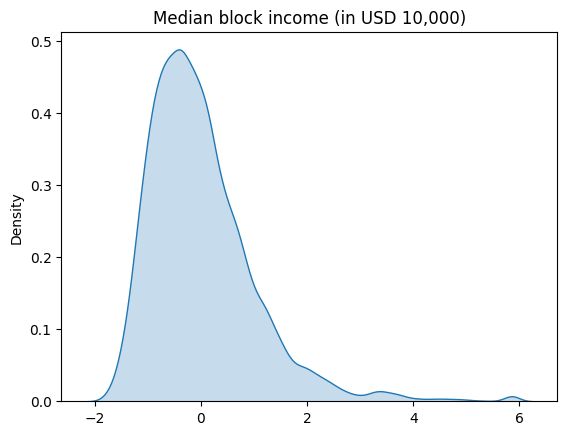

In [11]:
sns.kdeplot(X_train[:, 0], fill=True)
plt.title("Median block income (in USD 10,000)")

Text(0.5, 1.0, 'Median house age (in Years)')

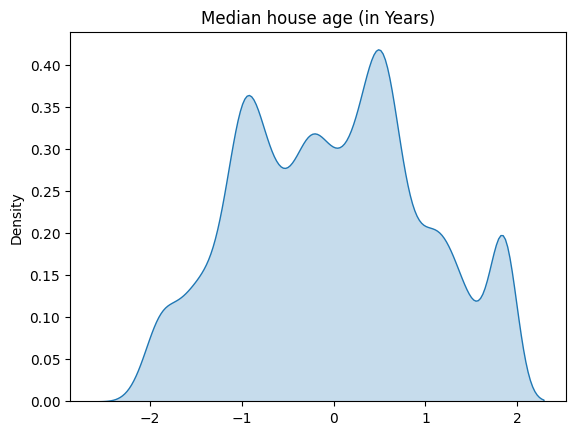

In [13]:
sns.kdeplot(X_train[:, 1], fill=True)
plt.title("Median house age (in Years)")

Text(0.5, 1.0, 'Average number of Rooms per household')

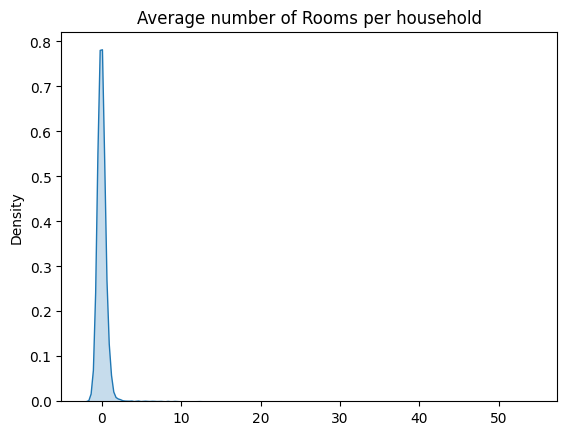

In [14]:
ddd = (X_train[:, 2] - np.mean(X_train[:,2])) / np.std(X_train[:,2])
sns.kdeplot(ddd, fill=True)
plt.title("Average number of Rooms per household")

Text(0.5, 1.0, 'Average Number of bedrooms per household')

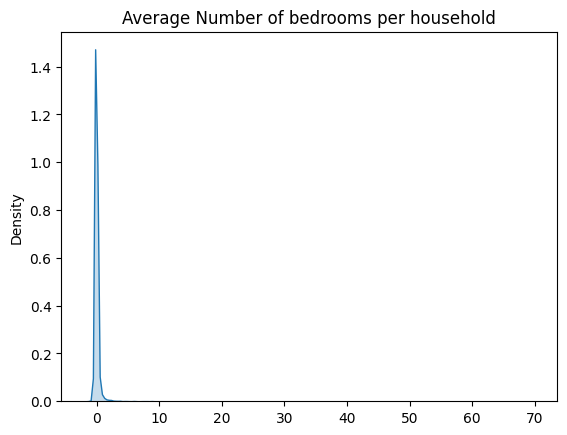

In [15]:
sns.kdeplot(X_train[:, 3], fill=True)
plt.title("Average Number of bedrooms per household")

Text(0.5, 1.0, 'Block Group Population')

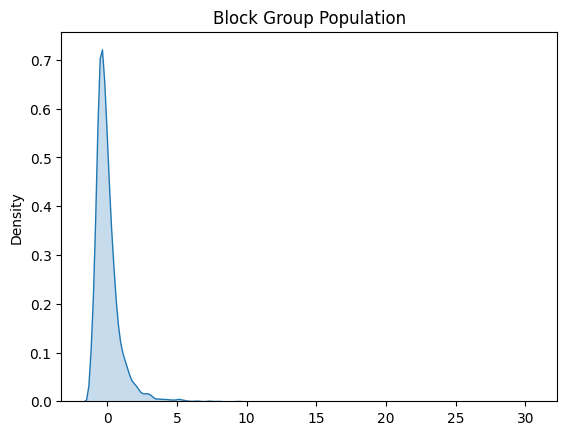

In [16]:
sns.kdeplot(X_train[:, 4], fill=True)
plt.title("Block Group Population")

Text(0.5, 1.0, 'Average Number of household members')

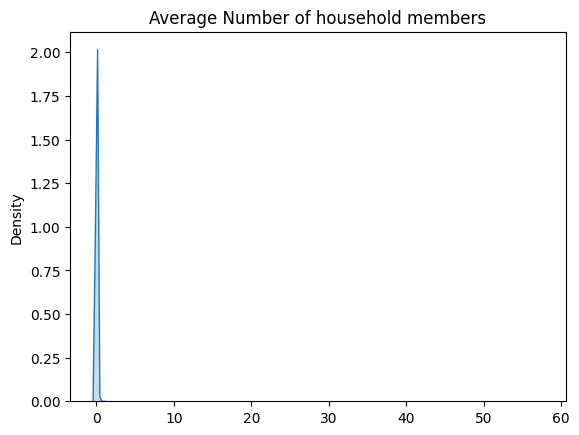

In [17]:
sns.kdeplot(X_train[:, 5], fill=True)
plt.title("Average Number of household members")

Text(0.5, 1.0, 'Latitude (deg)')

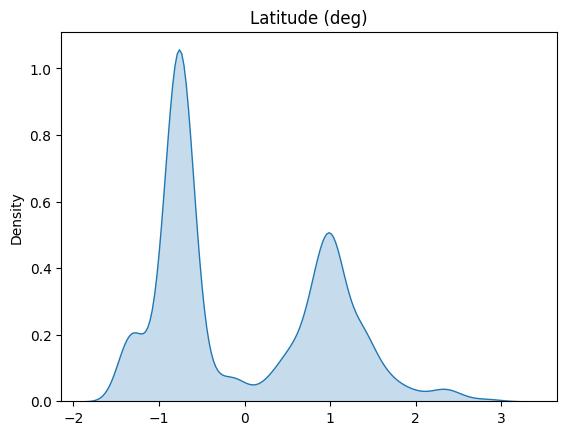

In [18]:
sns.kdeplot(X_train[:, 6], fill=True)
plt.title("Latitude (deg)")

Text(0.5, 1.0, 'Longitude (deg)')

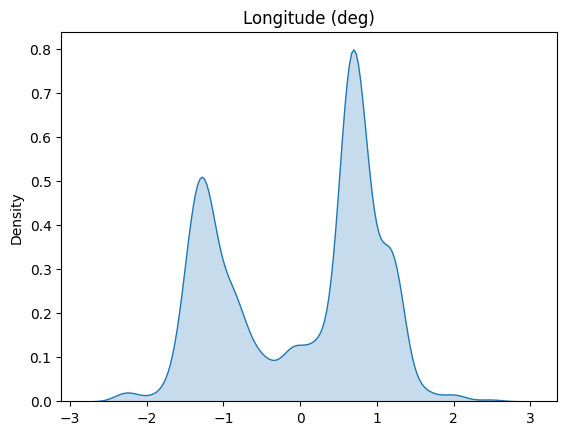

In [21]:
sns.kdeplot(X_train[:, 7], fill=True)
plt.title("Longitude (deg)")

## Model Fitting

#### Model 1: Linear Regression Model

Using Scikit-Learn Library model

In [107]:
mod1 = LinearRegression().fit(X_train, Y_train)

print("\nR^2 Value--")
print("On Train data: ", mod1.score(X_train, Y_train))
print("On Test data : ", mod1.score(X_test, Y_test))


R^2 Value--
On Train data:  0.6088968118672871
On Test data :  0.5943232652466204


Using Self-Built Linear Regression Model

In [111]:
class LinearRegression_self:
    def __init__ (self, reg_lambda = 1, model = "Linear"):
        self.lamda = reg_lambda
        self.model = model
        self.W = 0
        if (model != "Linear" and model != "Ridge" and model != "Lasso"):
            print("Invalid Model. Choose among Linear and Ridge only")
        
    def fit(self, X, Y):
        X = np.column_stack((X, np.ones(X.shape[0])))
        if (self.model == "Linear"):
            self.W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
        elif (self.model == "Ridge"):
            XTX = np.dot(X.T, X)
            I = np.eye(XTX.shape[0])
            self.W = np.dot(np.dot(np.linalg.inv(XTX + self.lamda*I), X.T), Y)
        else:
            print("Invalid model")
        return self
    
    def predict (self, X):
        X = np.column_stack((X, np.ones(X.shape[0])))
        Y_pred = np.dot(X, self.W)
        return Y_pred
    
    def score (self, X, Y):
        X = np.column_stack((X, np.ones(X.shape[0])))
        Y_pred = np.dot(X, self.W)
        
        num = np.squeeze(np.sum((Y - Y_pred) ** 2, axis = 0, keepdims = True))
        denom = np.squeeze(np.sum((Y - np.mean(Y)) ** 2, axis = 0, keepdims = True))
        r2 = 1 - (num/denom)
        return r2

In [113]:
mod = LinearRegression_self().fit(X_train, Y_train)
print("R^2 Value--")
print("Train data: ", mod.score(X_train, Y_train))
print("Test data : ", mod.score(X_test, Y_test))

R^2 Value--
Train data:  0.6088968118672871
Test data :  0.5943232652466202


The above results depict that the model has high bias but low variance. Therefore, data is <b>underfit</b> <br>
This can be resolved by: <br>
    1. Adding more train data <br>
    2. Using a different model <br>
The model already uses nearly 16,000 samples but still shows only 60% fit. This implies that
using <br> some other model for training purpose may yield better results.

The following 2 models used are Ridge and Lasso Regression. Since the model was underfit using Ordinary Linear Regression, so we expect the fit to not improve with the addition of regularization. This observation is experimentally shown below over this dataset.

#### Model 2: Ridge Regression Model

Using Scikit-Learn Library Model

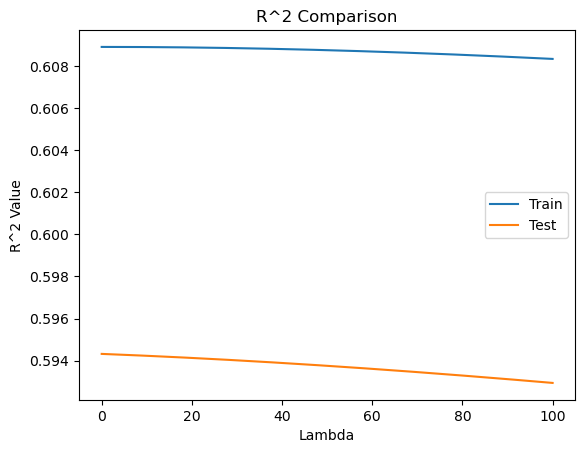

In [116]:
def RidgePlot():
    n = 1000
    x = np.linspace(0, 100, n)
    y1 = np.zeros(n)
    y2 = np.zeros(n)
    for i in range(n):
        mod2 = Ridge(alpha=i*0.1).fit(X_train, Y_train)
        y1[i] = mod2.score(X_train, Y_train)
        y2[i] = mod2.score(X_test, Y_test)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.legend(["Train", "Test"])
    plt.title("R^2 Comparison")
    plt.ylabel("R^2 Value")
    plt.xlabel("Lambda")
RidgePlot()

#### Model 3: Lasso Regression

Using Scikit-Learn Library Model

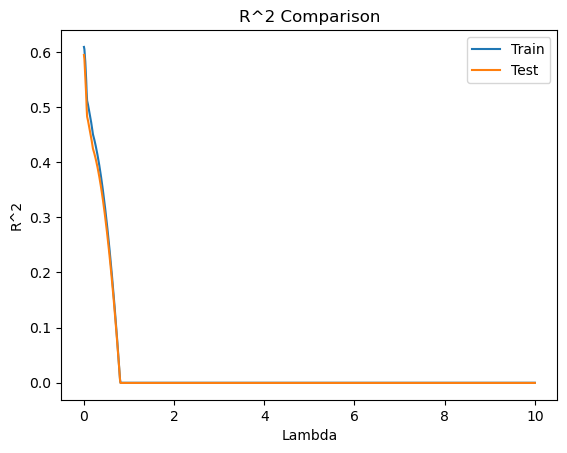

In [117]:
def LassoPlot():
    n = 1000
    x = np.linspace(0, 10, n)
    y1 = np.zeros(n)
    y2 = np.zeros(n)
    for i in range(0, n):
        if (i == 0):
            mod = LinearRegression().fit(X_train, Y_train)
        else:
            mod = Lasso(alpha=i*0.01).fit(X_train, Y_train)
        y1[i] = mod.score(X_train, Y_train)
        y2[i] = mod.score(X_test, Y_test)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.legend(["Train", "Test"])
    plt.title("R^2 Comparison")
    plt.ylabel("R^2")
    plt.xlabel("Lambda")
LassoPlot()

As we can see, the R^2 value has not improved (in fact, it became worse) with the addition of regularization.

#### Model 4: K Nearest Neighbors

Using Scikit-Learn Library Model

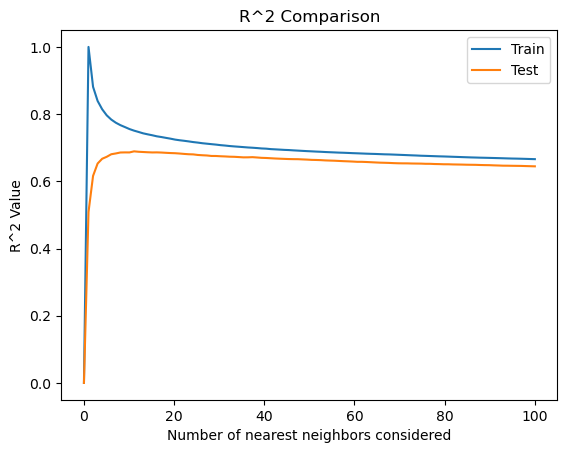

In [119]:
def KNNPlot():
    n = 100
    x = np.linspace(0, 100, n)
    y1 = np.zeros(n)
    y2 = np.zeros(n)
    for i in range(1, n):
        mod = KNeighborsRegressor(n_neighbors=i).fit(X_train, Y_train)
        y1[i] = mod.score(X_train, Y_train)
        y2[i] = mod.score(X_test, Y_test)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.legend(["Train", "Test"])
    plt.title("R^2 Comparison")
    plt.ylabel("R^2 Value")
    plt.xlabel("Number of nearest neighbors considered")
    
KNNPlot()

Using Self-made Implementation

In [122]:
class heap:
    def __init__(self, arr, k):
        self.h = 0
        self.dist = np.array(arr)
        self.N = len(arr)
        self.n = k + 1
        
        if (self.N <= k):
            self.h = np.zeros(self.N)
            for i in range(self.N):
                self.h[i] = i
            return
        
        self.h = np.zeros(k + 1)
        for i in range(k + 1):
            self.h[i] = i
        
        self.make_heap()
        
        for i in range(k + 1, self.N):
            self.h[0] = i
            self.heapify(0)
        
        self.h = np.delete(self.h, 0)
    
    def heapify(self, i):
        i = i + 1;
        while(True):
            if (2*i > self.n):
                return
            if (2*i + 1 > self.n and 2*i <= self.n):
                if (self.dist[int(self.h[i-1])] < self.dist[int(self.h[2*i - 1])]):
                    self.h[i-1], self.h[2*i - 1] = self.h[2*i - 1], self.h[i - 1]   #swapping
                return
            if (2*i + 1 <= self.n):
                if (self.dist[int(self.h[2*i - 1])] >= self.dist[int(self.h[2*i + 1 - 1])]):
                    if (self.dist[int(self.h[i - 1])] < self.dist[int(self.h[2*i - 1])]):
                        self.h[i - 1], self.h[2*i - 1] = self.h[2*i - 1], self.h[i - 1]
                        i = 2*i
                    else:
                        return
                else:
                    if (self.dist[int(self.h[i - 1])] < self.dist[int(self.h[2*i + 1 - 1])]):
                        self.h[i - 1], self.h[2*i + 1 - 1] = self.h[2*i + 1 - 1], self.h[i - 1]
                        i = 2*i + 1
                    else:
                        return
    
    def make_heap(self):
        i = self.n - 1
        while (i >= 0):
            self.heapify(i)
            i = i - 1
    
    def get_heap(self):
        return self.h

In [123]:
class KNNRegressor:
    def __init__(self, k):
        self.m = 0
        self.N = 0
        self.k = k
        self.dist = np.zeros(0)
        self.X_train = np.zeros(0)
        self.y_train = np.zeros(0)
        self.shortlist = np.zeros(k)
    
    def create_dist(self, x_new):
        for i in range(self.N):
            self.dist[i] = np.sum((x_new - X_train[i]) ** 2) ** 0.5
    
    def train (self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.N = len(X_train)
        self.m = len(X_train[0])
        self.dist = np.zeros(self.N)
            
    def predict(self, _Xpred):
        n = len(_Xpred)
        pred = np.zeros(n)
        for i in range(n):
            self.shortlist = np.zeros(self.k)
            self.create_dist(_Xpred[i])
            h = heap(self.dist, self.k)
            h = h.get_heap()
            for j in range(self.k):
                self.shortlist[j] = self.y_train[h[j]]
            pred[i] = np.mean(self.shortlist)
        return pred

Using a K-Nearest Neighbours Model improved the R^2 value of the model. Hence, this model is a better fit to the data than Simple Linear Regression

#### Model 5: L-Layer Neural Network

Self-made Implementation

In [131]:
class NNModel:
    def __init__(self, L = 2, n = [X_train.shape[1], 10, 1]):
        self.X = X_train.T
        self.Y = Y_train.reshape(1, self.X.shape[1])
        
        self.L = L
        self.m = self.X.shape[1]
        self.n = np.array(n)
        self.W = {}
        self.B = {}
        
        self.initialise_parameters()
    
    def initialise_parameters (self):
        for i in range(1, self.L+1):
            self.W["W" + str(i)] = np.random.randn(self.n[i], self.n[i-1]) * (1 / self.n[i])
            self.B["B" + str(i)] = np.zeros((self.n[i], 1))
            
    def a (self, z):                               #ReLU Activation Function
        return np.maximum(0,z)
    
    def forward_propagation (self, X):
        caches = []
        A = X
        for i in range(1, self.L+1):
            Z = np.dot(self.W["W" + str(i)], A) + self.B["B" + str(i)]
            cache = [Z, A, self.W["W" + str(i)]]
            caches.append(cache)
            A = self.a(Z)
        return A, caches
        
    def compute_cost (self, Y_hat):                  #Ordinary Least Squares Cost
        cost = np.squeeze(0.5/self.m) * np.sum((Y_hat - self.Y) ** 2, axis = 1, keepdims=True)
        return cost
    
    def back_propagation (self, A, caches):       #in cache, I need: Z_l, A_l-1, W_l
        dA = (1/self.m) * (A - self.Y)
        grads = {}
        for i in range(self.L, 0, -1):
            Z, A_prev, W = caches[i-1]
            dZ = dA * (Z >= 0)
            grads["dW" + str(i)] = np.dot(dZ, A_prev.T)                       #dW
            grads["dB" + str(i)] = dZ[:, 0].reshape(dZ[:, 0].shape[0], 1)     #dB
            dA = np.dot(W.T, dZ)                                              #dA_prev
        return grads

    def update_parameters(self, grads, learning_rate):           #Ordinary Gradient Descent
        for j in range(1, self.L+1):
            self.W["W" + str(j)] = self.W["W" + str(j)] - (learning_rate * grads["dW" + str(j)])
            self.B["B" + str(j)] = self.B["B" + str(j)] - (learning_rate * grads["dB" + str(j)])
    
    def train (self, num_iterations=1000, learning_rate=1):
        for i in range(num_iterations):
            A, caches = self.forward_propagation(self.X)         #Forward Propagation
            cost = np.squeeze(self.compute_cost(A))              #Cost Computation
            grads = self.back_propagation(A, caches)             #Back Propagation
            self.update_parameters(grads, learning_rate)         #Updating Parameters
            if (i % 250 == 0):
                print("cost after ", i, " iterations: ", cost)
            
    def score (self, X, Y):
        Y_hat, misc = self.forward_propagation(X)
        
        num = np.squeeze(np.sum((Y_hat - Y) ** 2, axis=1, keepdims=True))
        den = np.squeeze(np.sum((Y - np.mean(Y)) ** 2, axis=1, keepdims=True))
        r_2 = 1 - (num/den)
        return r_2
        

k = NNModel(L = 5, n = [X_train.shape[1], 100, 50, 20, 10, 1])
k.train(num_iterations=100000, learning_rate=0.08)

print("Train: ", k.score(X_train.T, Y_train))
print("Test: ", k.score(X_test.T, Y_test))

cost after  0  iterations:  2.816732525854093
cost after  250  iterations:  0.26136375321547506
cost after  500  iterations:  0.24099028470925726
cost after  750  iterations:  0.21573748014203384
cost after  1000  iterations:  0.20082996688208485
cost after  1250  iterations:  0.1842360991118333
cost after  1500  iterations:  0.17353269291102524
cost after  1750  iterations:  0.1662531175745878
cost after  2000  iterations:  0.16094780064744316
cost after  2250  iterations:  0.1569669532387081
cost after  2500  iterations:  0.1537956228142584
cost after  2750  iterations:  0.15135121576270147
cost after  3000  iterations:  0.1496093310761327
cost after  3250  iterations:  0.14816778719256152
cost after  3500  iterations:  0.1467573076749525
cost after  3750  iterations:  0.1457980797677231
cost after  4000  iterations:  0.14474740324128646
cost after  4250  iterations:  0.14377203617561102
cost after  4500  iterations:  0.14317712433015206
cost after  4750  iterations:  0.1422809896318

cost after  40000  iterations:  0.11392867239173807
cost after  40250  iterations:  0.11276322435206969
cost after  40500  iterations:  0.11177315880792021
cost after  40750  iterations:  0.11348593345435752
cost after  41000  iterations:  0.11122893634471259
cost after  41250  iterations:  0.11090391407273659
cost after  41500  iterations:  0.11333978185519497
cost after  41750  iterations:  0.11350180159613457
cost after  42000  iterations:  0.1110490439798785
cost after  42250  iterations:  0.11220225765065632
cost after  42500  iterations:  0.11008248842885898
cost after  42750  iterations:  0.11031519069097702
cost after  43000  iterations:  0.11110351182046761
cost after  43250  iterations:  0.10997826588437147
cost after  43500  iterations:  0.11069282778740731
cost after  43750  iterations:  0.11015172329352232
cost after  44000  iterations:  0.10883319276828018
cost after  44250  iterations:  0.10966522777432293
cost after  44500  iterations:  0.1085538164156185
cost after  44

KeyboardInterrupt: 

In [132]:
print("Train: ", k.score(X_train.T, Y_train))
print("Test: ", k.score(X_test.T, Y_test))

Train:  0.8639969941146441
Test:  0.7787520172006908


The above train and test accuracy of nearly 80% shows that the Neural Network Implementation is a much better fit compared to simpler models like linear regression and K-Nearest Neighbours